In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [18]:
data = pd.read_csv('data/train.csv', sep=',')

In [19]:
# нет пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60487 entries, 0 to 60486
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      60487 non-null  int64
 1   time    60487 non-null  int64
 2   x       60487 non-null  int64
 3   y       60487 non-null  int64
dtypes: int64(4)
memory usage: 1.8 MB


In [20]:
def remove_noises(noise_data):
    lof = LocalOutlierFactor(n_neighbors=15, novelty=True)
    lof.fit(noise_data[['x']].to_numpy())
    outlier_predicted = lof.predict(noise_data[['x']].to_numpy())
    clear_data = noise_data[outlier_predicted == 1].copy()

    return clear_data

In [21]:
data = remove_noises(data)

In [34]:
user = data[data.id == 4]

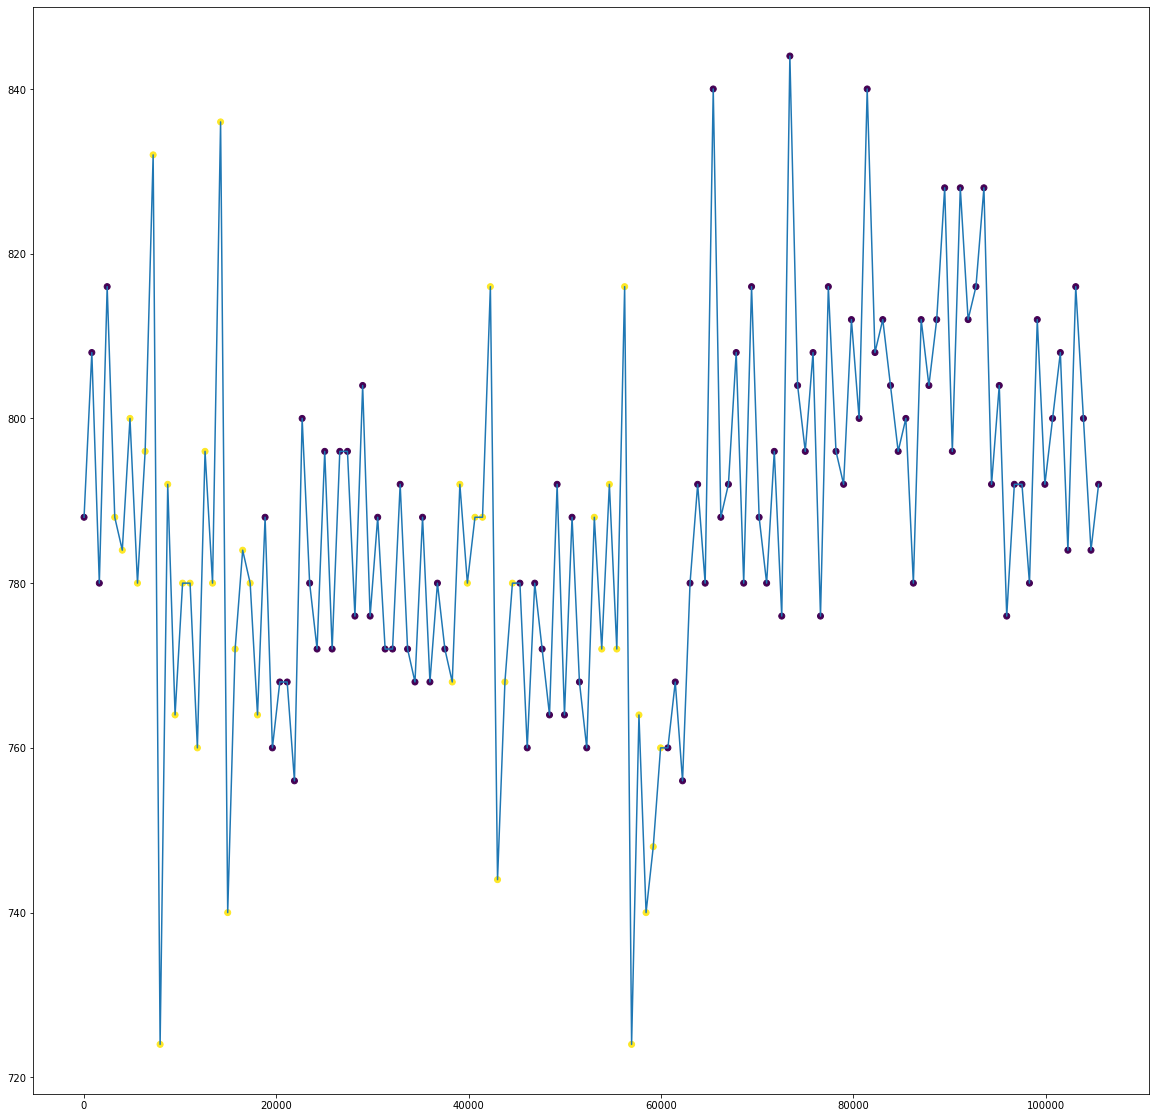

In [35]:
plt.figure(figsize=(20, 20))
plt.plot(user.time, user.x)
plt.scatter(user.time, user.x,c=user.y)
plt.savefig('pattern.png')

In [24]:
"""
mean = data.loc[data['id'] == 1, 'x'].mean()
data = data[data['x'] < 1.5 * mean]
data = data[data['x'] > 0.5 * mean]
"""
mean = data.loc[data['id'] == 1, 'x'].mean()

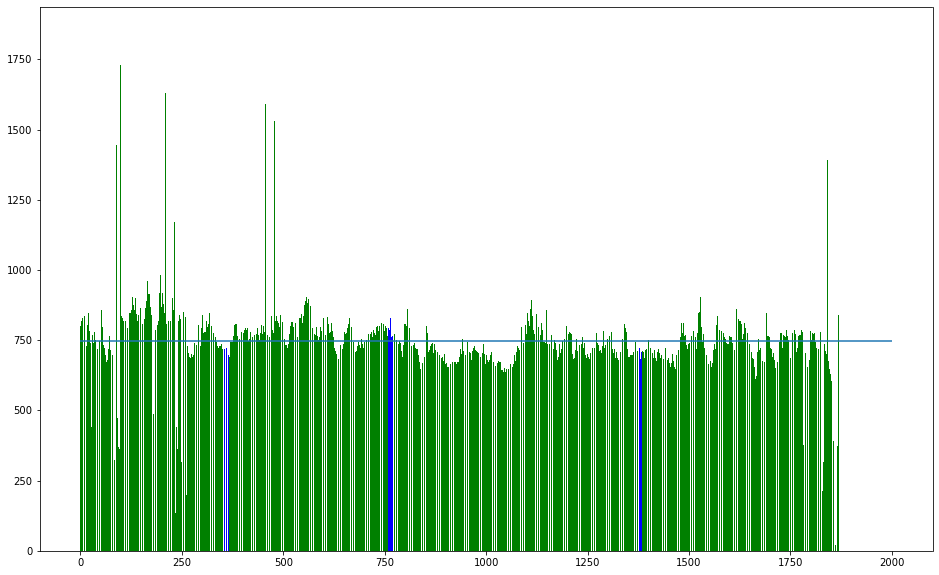

In [25]:
data['color'] = 'g'
data.loc[data['y'] == 1, 'color'] = 'b'
plt.figure(figsize=(16, 10))
plt.hlines(mean, 0, 2000)

plt.bar(data.loc[data['id'] == 1].index, data.loc[data['id'] == 1, 'x'], color=data.loc[data['id'] == 1, 'color'] )
plt.savefig('testfig0.png')

<AxesSubplot:>

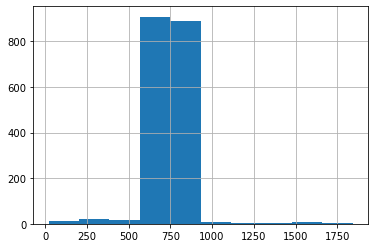

In [26]:
data.loc[data['id'] == 1, 'x'].hist()

In [27]:
#data.drop(columns='color', inplace=True)

In [28]:
new_data = pd.DataFrame(columns=['count', 'anomaly'])

In [29]:
STEP = 10000

def_list = []
user1 = data.loc[data.id == 1, ['time']]

anomaly_list = []

for index in user1.loc[user1.time < (user1.time.max() - STEP)].index:

    curr_value = user1.loc[index]
    next_value = curr_value.time + STEP

    nearest = user1.loc[index + 1 :]

    nearest_index = (nearest.time - next_value).abs().sort_values().index[0]
    #print(nearest_index)
    def_list.append(nearest_index - index)

    anomaly = data.loc[index : nearest_index, 'y']

    if 1 in anomaly.values:
        anomaly_list.append(1)
    else:
        anomaly_list.append(0)



In [30]:
new_data['count'] = def_list
new_data['anomaly'] = anomaly_list

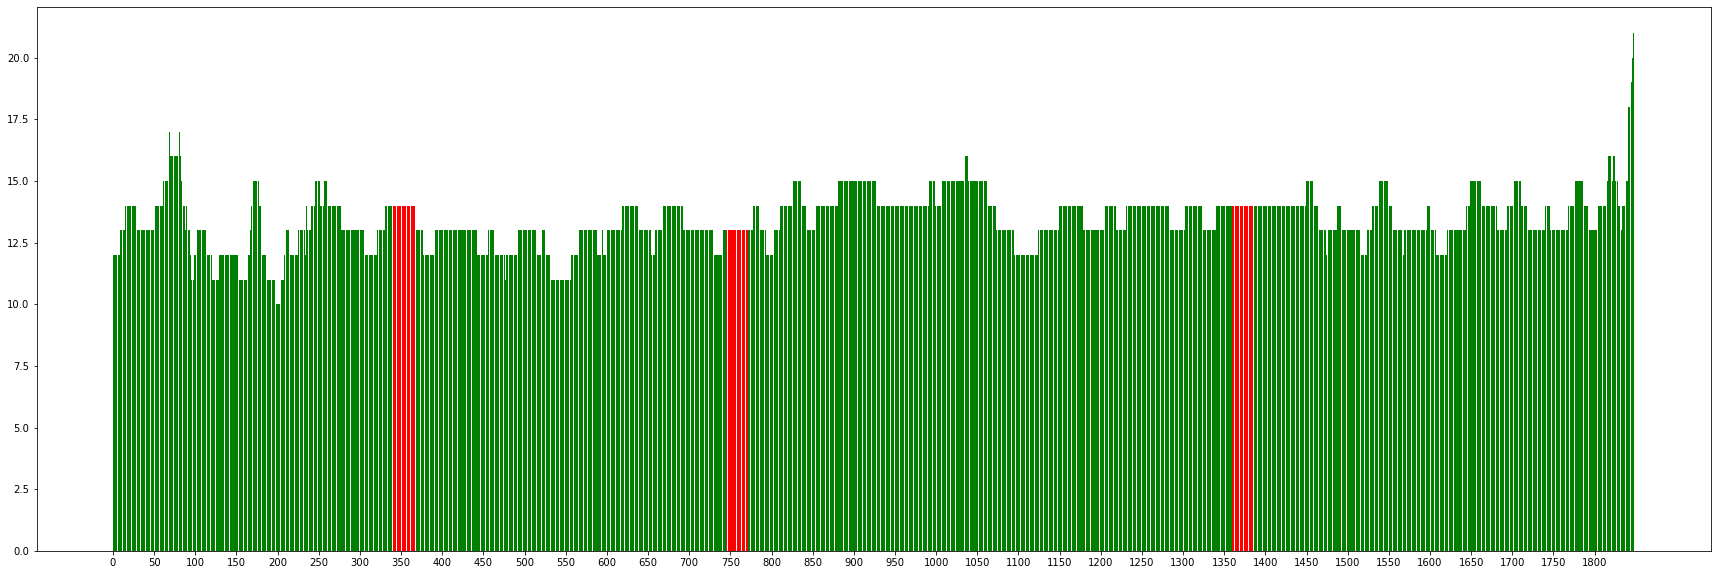

In [31]:
new_data['color'] = 'g'
new_data.loc[new_data['anomaly'] == 1, 'color'] = 'r'

plt.figure(figsize=(30, 10))

plt.bar(new_data.index, new_data['count'].values, color=new_data['color'].values)
plt.xticks([x for x in range(0,new_data.shape[0], 50 )] )
plt.savefig('testfig.png')


In [32]:
np.unique(new_data.anomaly, return_counts=True)

(array([0, 1], dtype=int64), array([1769,   80], dtype=int64))